In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/friends_info.csv')

In [3]:
df.head()

,Unnamed: 0,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,2,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1
2,3,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,8.2
3,4,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,19.7,8.1
4,5,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         236 non-null    int64  
 1   season             236 non-null    int64  
 2   episode            236 non-null    int64  
 3   title              236 non-null    object 
 4   directed_by        236 non-null    object 
 5   written_by         236 non-null    object 
 6   air_date           236 non-null    object 
 7   us_views_millions  236 non-null    float64
 8   imdb_rating        236 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 16.7+ KB


In [5]:
df = df.drop(columns='Unnamed: 0')

In [6]:
df.head()

,season,episode,title,directed_by,written_by,air_date,us_views_millions,imdb_rating
0,1,1,The Pilot,James Burrows,David Crane & Marta Kauffman,1994-09-22,21.5,8.3
1,1,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,20.2,8.1
2,1,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,19.5,8.2
3,1,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,19.7,8.1
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,18.6,8.5


## EDA

### Total no. of seasons & episodes

In [7]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Indicator(
    mode = "number",
    value = df["season"].nunique(),
    number={'font':{'color': "#AFEEEE",'size':80}},
    title = {"text": "<span style='font-size:3em;color:grey'>Seasons</span>"},
    domain = {'x': [0, 0.5], 'y': [0.6, 1]}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(df["episode"]),
    number={'font':{'color': "#AFEEEE",'size':80}},
    title = {"text": "<span style='font-size:3em;color:grey'>Episodes</span>"},
    domain = {'x': [0.5, 1], 'y': [0, 0.4]}))

fig.show()

### No. of episodes in each season

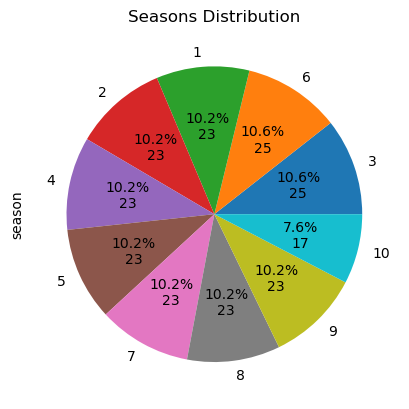

In [8]:
df['season'].value_counts().plot(kind='pie',autopct=lambda p: f'{p:.1f}%\n{int(p * df["season"].value_counts().sum() / 100)}')
plt.title('Seasons Distribution')
plt.show()

### Total Directors Count

In [9]:

data_director= df.copy()
data_director["season"]= "season"+" "+data_director["season"].astype(str)
data_director=data_director.dropna(subset=["directed_by"],axis=0)

unique_directors_count = data_director['directed_by'].nunique()

print(f'Total No. of Directors: {unique_directors_count}')

Total No. of Directors: 30


### How many seasonwise episodes directed by directors?

In [10]:
fig = px.sunburst(data_director,
                  path=['directed_by', 'season', 'episode'])
fig.update_layout(width=650, height=650)
fig.show()

### Total Writers Count

In [11]:
data_writer= df.copy()
data_writer.dropna(subset=["written_by"], axis=0, inplace=True)
data_writer["written_by"][data_writer["written_by"].str.contains("David Crane & Marta Kauffman|Marta Kauffman & David Crane")]="David Crane & Marta Kauffman"
writer_count=data_writer["written_by"].value_counts().to_frame().reset_index().rename(columns={"index":"Written by", "written_by":"number of episodes"})


unique_writers_count = data_writer['written_by'].nunique()

print(f'Total No. of Writers: {unique_writers_count}')

Total No. of Writers: 94


### No. of episodes written by each writer

In [12]:
fig = px.sunburst(writer_count,
                  path=["number of episodes",'Written by'], 
                  values='number of episodes',
                  color='number of episodes',
                  color_continuous_scale="agsunset")
                 
fig.update_layout(title_text="Number of episodes vs writers", 
                  titlefont={'size': 24, 'family':'Serif'},
                  width=600, height=600)
fig.show()

### Episode with highest ratings

In [13]:
from rich.console import Console
from rich.text import Text

# Find the row with the maximum rating
max_rating_row = df.loc[df['imdb_rating'].idxmax()]

episode_name = max_rating_row['title']
season = max_rating_row['season']
episode_number = max_rating_row['episode']
max_rating = max_rating_row['imdb_rating']

# Create colorful, enlarged text using rich
console = Console()
text = Text()

# Add styled and enlarged text
text.append("\n🎬 🎬 🎬 🎬 🎬 EPISODE\n", style="bold green")
text.append(f"{episode_name.upper()}\n\n", style="bold cyan underline")

text.append("📅 " * 4 + f"SEASON {season}\n\n", style="bold magenta")
text.append("🎞️ " * 4 + f"EPISODE NUMBER: {episode_number}\n\n", style="bold yellow")
text.append("⭐ " * 4 + f"RATING: {max_rating}\n\n", style="bold white on blue")

# Center-align the text during printing
console.print(text, justify="center")


🎬 🎬 🎬 🎬 🎬 EPISODE                                               
                                         THE ONE WHERE EVERYBODY FINDS OUT                                         
                                                                                                                   
                                               📅 📅 📅 📅 SEASON 5                                                
                                                                                                                   
                                            🎞️ 🎞️ 🎞️ 🎞️ EPISODE NUMBER: 14                                             
                                                                                                                   
                                              ⭐ ⭐ ⭐ ⭐ RATING: 9.7

### Episode with highest views

In [14]:
# Find the row with the maximum views
max_rating_row = df.loc[df['us_views_millions'].idxmax()]

episode_name = max_rating_row['title']
season = max_rating_row['season']
episode_number = max_rating_row['episode']
max_rating = max_rating_row['imdb_rating']
views = max_rating_row['us_views_millions']

# Create colorful, enlarged text using rich
console = Console()
text = Text()

# Add styled and enlarged text
text.append("\n🎬 🎬 🎬 🎬 🎬 EPISODE\n", style="bold green")
text.append(f"{episode_name.upper()}\n\n", style="bold cyan underline")

text.append("📅 " * 4 + f"SEASON {season}\n\n", style="bold magenta")
text.append("🎞️ " * 4 + f"EPISODE NUMBER: {episode_number}\n\n", style="bold yellow")
text.append("⭐ " * 4 + f"RATING: {max_rating}\n\n", style="bold blue")
text.append("👁️ " * 4 + f"Views: {views}\n\n", style="bold white on blue")
# Center-align the text during printing
console.print(text, justify="center")

🎬 🎬 🎬 🎬 🎬 EPISODE                                               
                                            THE ONE AFTER THE SUPERBOWL                                            
                                                                                                                   
                                               📅 📅 📅 📅 SEASON 2                                                
                                                                                                                   
                                            🎞️ 🎞️ 🎞️ 🎞️ EPISODE NUMBER: 12                                             
                                                                                                                   
                                              ⭐ ⭐ ⭐ ⭐ RATING: 8.6                                              
                                                                                                                   
                                                👁️ 👁️ 👁️ 👁️ Views: 52.9

### Season-wise Popularity Distribution 

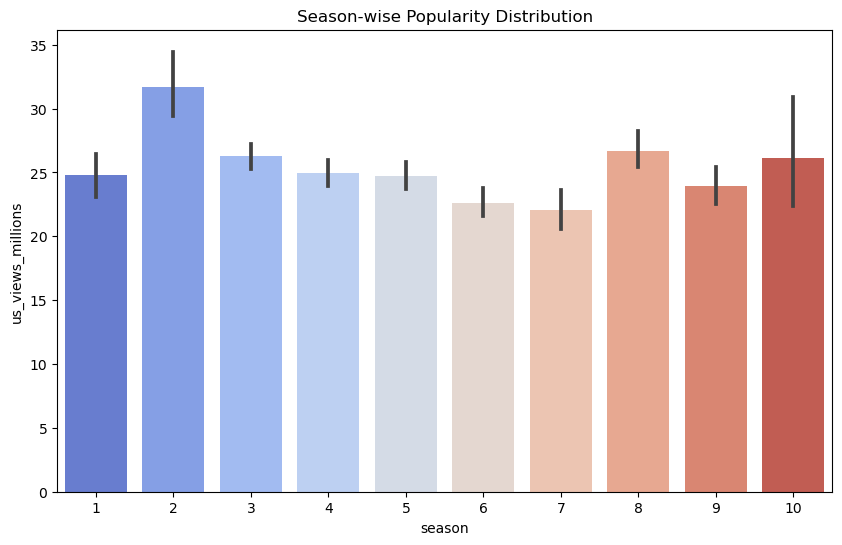

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(df,x=df.season,y=df.us_views_millions,palette='coolwarm')
plt.title('Season-wise Popularity Distribution')
plt.show()

According to graph popular season was season 2 follwed by season 10

### Episode-wise Popularity Distribution

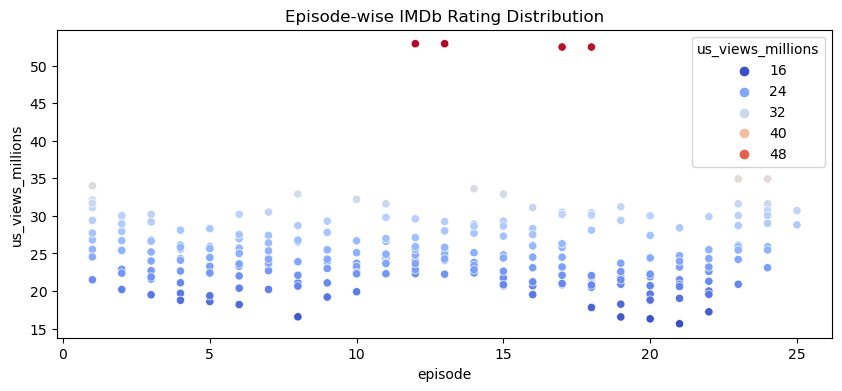

In [16]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.episode, y=df.us_views_millions, data=df,palette='coolwarm',hue=df.us_views_millions)
plt.title('Episode-wise IMDb Rating Distribution')
plt.show()

### Season wise ratings distribution

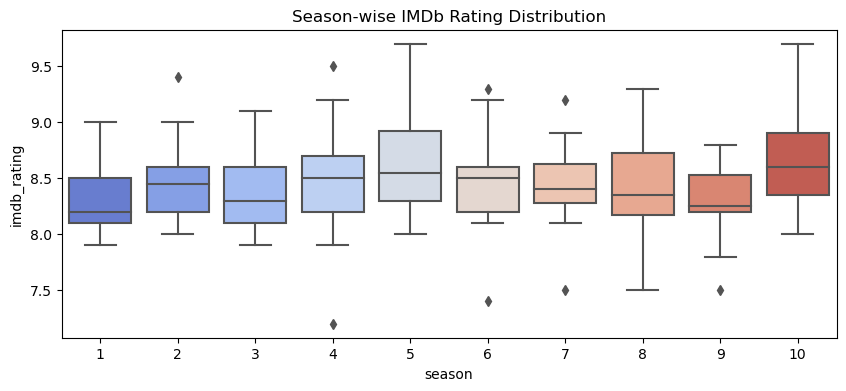

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.season, y=df.imdb_rating, data=df,palette='coolwarm')
plt.title('Season-wise IMDb Rating Distribution')
plt.show()

There are outliers present in season 2, 4, 6, 7 and 9 representing that some episodes in those seasons have very high or very low ratings.

### Episode wise ratings distribution

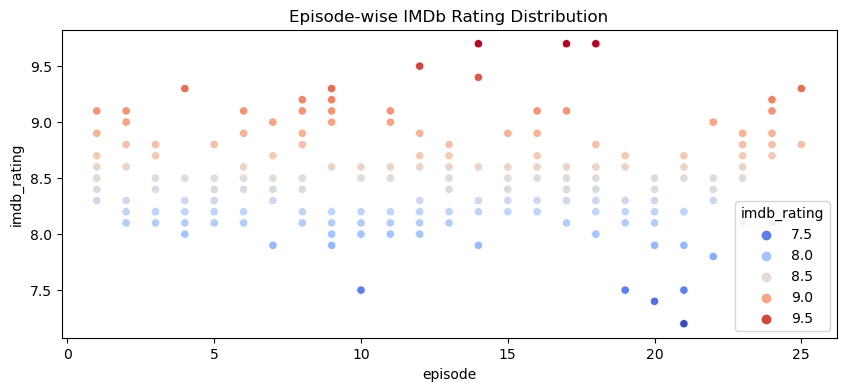

In [18]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df.episode, y=df.imdb_rating, data=df,palette='coolwarm',hue=df.imdb_rating)
plt.title('Episode-wise IMDb Rating Distribution')
plt.show()

### Most Popular Episode in each Season

In [19]:
# Group by season and get the episode with the maximum rating for each season
most_popular_episodes = df.loc[df.groupby('season')['imdb_rating'].idxmax()]

# Create a bar chart showing the most popular episode per season
fig = px.bar(
    most_popular_episodes,
    x='season', 
    y='imdb_rating', 
    color='season',
    text='title',
    labels={'imdb_rating': 'Max IMDb Rating', 'season': 'Season'},
    title="Most Popular Episode by Season",color_continuous_scale='sunset'
)

# Customize the layout for better display
fig.update_traces(texttemplate='%{text}', textposition='outside', marker=dict(line=dict(width=2, color='black')))
fig.update_layout(
    plot_bgcolor="white",
    title_x=0.5,  # Center the title
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=True),
)

# Show the plot
fig.show()

### Top 10 most viewed episodes

In [20]:
most_viewed_10= df.sort_values(by = ["us_views_millions"], ascending=False).iloc[:10,:]
colors = ['#696969',] * 30
colors[-4] = 'crimson'

fig = go.Figure(data=[go.Bar(x=most_viewed_10["title"], y=most_viewed_10["us_views_millions"],
                             marker_color=colors, width=[0.6]*30)])
fig.update_layout(title_text="Top 10 most viewed 'Friends' episodes",xaxis_title="Episode Title",yaxis_title="Viewers(millions)",
                  height=750, bargroupgap=0.1)
fig.show()

### Directors who directed more than 10 episodes

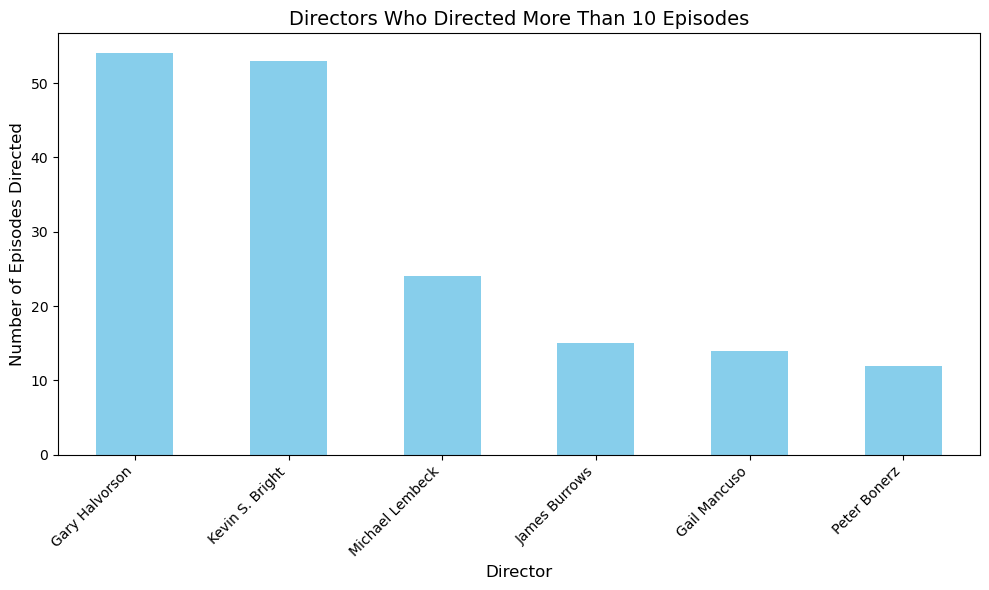

In [21]:
# Count number of episodes directed by each director
director_count = df['directed_by'].value_counts()

# Filter directors who have directed more than 10 episodes
directors_with_more_than_10 = director_count[director_count > 10]

# Plot
plt.figure(figsize=(10, 6))
directors_with_more_than_10.plot(kind='bar', color='skyblue')
plt.title('Directors Who Directed More Than 10 Episodes', fontsize=14)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Episodes Directed', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Episodes directed by Devide Schwimmer AKA Ross

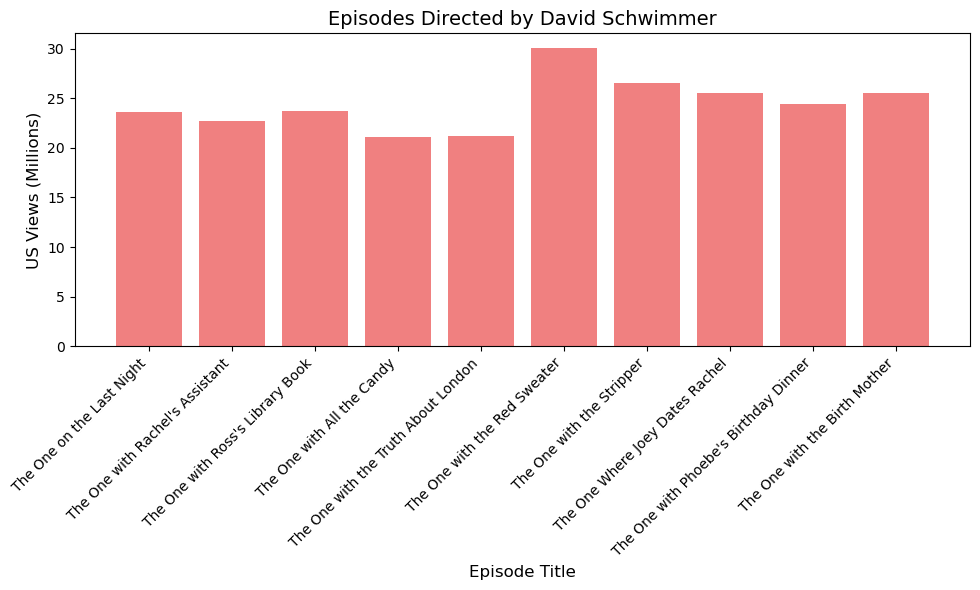

In [22]:
# Filter for episodes directed by David Schwimmer
schwimmer_episodes = df[df['directed_by'] == 'David Schwimmer']

# Plot the episodes directed by David Schwimmer
plt.figure(figsize=(10, 6))
plt.bar(schwimmer_episodes['title'], schwimmer_episodes['us_views_millions'], color='lightcoral')
plt.title('Episodes Directed by David Schwimmer', fontsize=14)
plt.xlabel('Episode Title', fontsize=12)
plt.ylabel('US Views (Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Popularity trend over 10 years

In [23]:
fig=px.line(df, x="air_date", y="us_views_millions", color="season", markers=True)
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [24]:
import re
import nltk
stpwrd = nltk.corpus.stopwords.words('english')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

## Script Data Cleaning

In [25]:
df_script = pd.read_csv('dataset/friends.csv')

In [26]:
df_script.head()

,Unnamed: 0,text,speaker,season,episode,scene,utterance
0,1,There's nothing to tell! He's just some guy I ...,Monica Geller,1,1,1,1
1,2,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,1,1,1,2
2,3,"All right Joey, be nice. So does he have a hum...",Chandler Bing,1,1,1,3
3,4,"Wait, does he eat chalk?",Phoebe Buffay,1,1,1,4
4,5,"(They all stare, bemused.)",Scene Directions,1,1,1,5


In [27]:
df_script = df_script.drop(columns=['Unnamed: 0','season','episode','scene','utterance'])

In [28]:
df_script.head()

,text,speaker
0,There's nothing to tell! He's just some guy I ...,Monica Geller
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing
3,"Wait, does he eat chalk?",Phoebe Buffay
4,"(They all stare, bemused.)",Scene Directions


In [29]:
df_script.dropna(inplace=True)
cleaned_script = df_script.copy()

stpwrd = nltk.corpus.stopwords.words('english')

def clean(text):
    # removing all the characters other than alphabets and removing any spacing at the starting/end of text
    cleaned_text= re.sub("^\s|\s$","",re.sub("[^a-zA-Z]", " ", text))
    # converting text to lower case
    cleaned_text= cleaned_text.lower()
    return cleaned_text
    
cleaned_script["text"]= cleaned_script["text"].apply(lambda x: clean(x))
cleaned_script["speaker"]= cleaned_script["speaker"].apply(lambda x: clean(x))
cleaned_script.head()

,text,speaker
0,there s nothing to tell he s just some guy i ...,monica geller
1,c mon you re going out with the guy there s ...,joey tribbiani
2,all right joey be nice so does he have a hum...,chandler bing
3,wait does he eat chalk,phoebe buffay
4,they all stare bemused,scene directions


In [30]:
cleaned_script.speaker.value_counts()

rachel green        9312
ross geller         9157
chandler bing       8465
monica geller       8441
joey tribbiani      8171
                    ... 
waiter in drag         1
anchorwoman            1
danny s sister         1
a female student       1
the paramedic          1
Name: speaker, Length: 682, dtype: int64

In [31]:
# getting only the scripts of 6 main characters
script_6=cleaned_script[cleaned_script["speaker"].str.contains("(ross geller|monica geller|joey tribbiani|chandler bing|phoebe buffay|rachel green|all)") & ~cleaned_script["speaker"].str.contains("(joey tribbiani sr|allesandro|tall guy|ballerina|sally|mrs  wallace|guy all the way in the back)")]
script_6.head()

,text,speaker
0,there s nothing to tell he s just some guy i ...,monica geller
1,c mon you re going out with the guy there s ...,joey tribbiani
2,all right joey be nice so does he have a hum...,chandler bing
3,wait does he eat chalk,phoebe buffay
5,just cause i don t want her to go through w...,phoebe buffay


In [32]:
script_6.speaker.value_counts()

rachel green      9312
ross geller       9157
chandler bing     8465
monica geller     8441
joey tribbiani    8171
phoebe buffay     7501
all                347
Name: speaker, dtype: int64

### Words that 6 main characters say the most

In [33]:
most_common= script_6.copy()

# removing some more words 
new_stopwords =["well", "okay", "oh", "hey", "know", "yeah", "right", "really","uh", "guy", "im","umm"]
stpwrd.extend(new_stopwords)
def clean_(text):
    word1= text.split()
    word= [word for word in word1 if not word in stpwrd]
    word= " ".join(word)
    return word

most_common["text"]= most_common["text"].apply(lambda x: clean_(x))

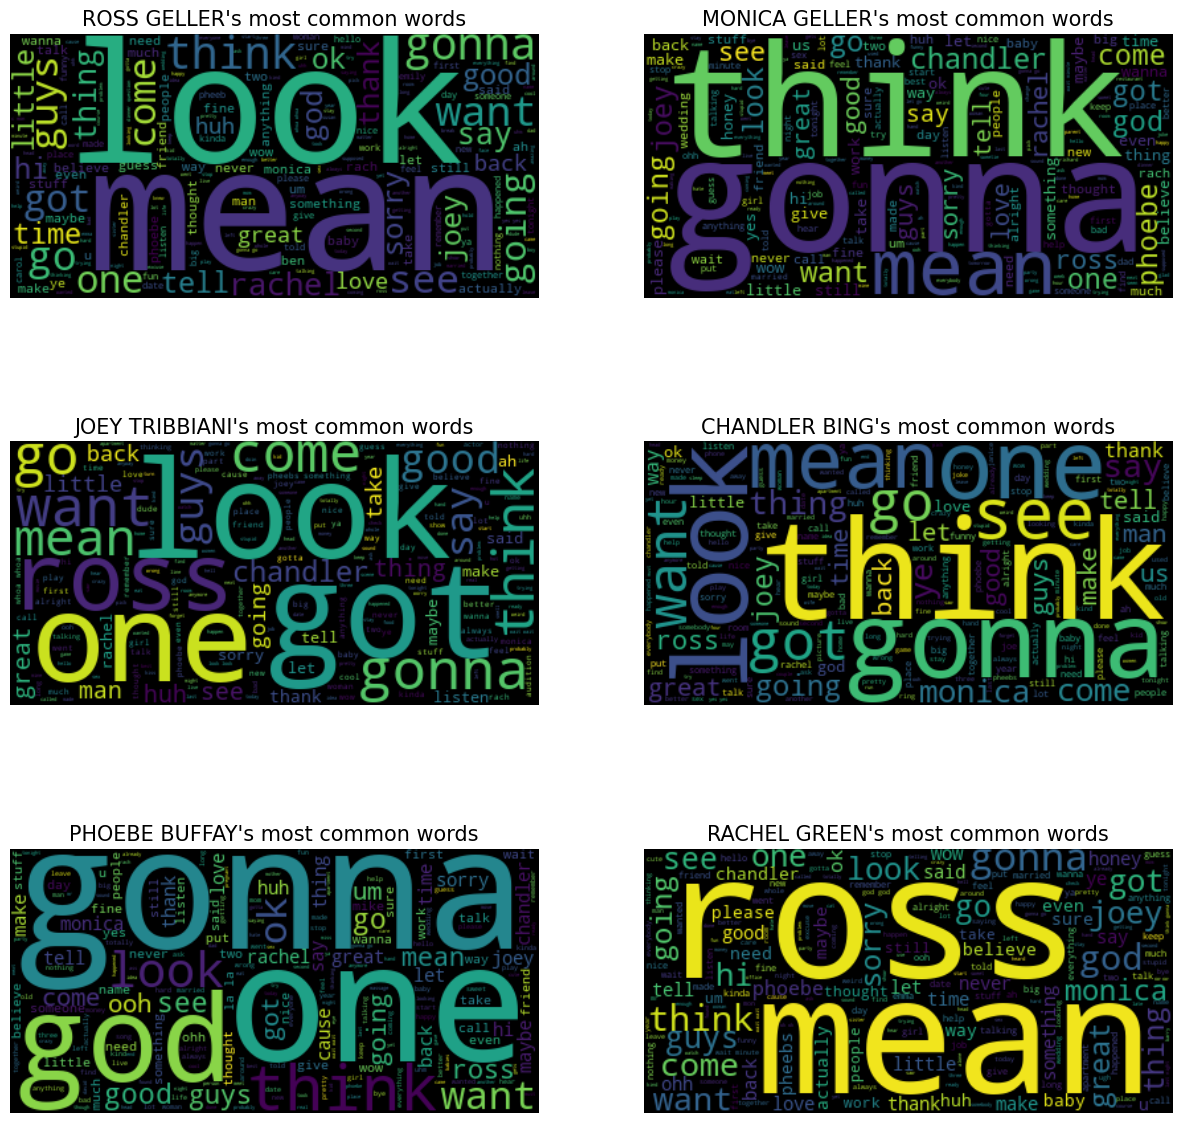

In [35]:
i=1
fig,axes= plt.subplots(3,2,figsize=(15,15))
for name in ['ross geller','monica geller','joey tribbiani','chandler bing','phoebe buffay','rachel green']:
    plt.subplot(3,2,i)
    name_=most_common[most_common["speaker"].str.contains(name)]
    text_combined= ', '.join(name_['text'])
    wordcloud = WordCloud( background_color="black").generate(text_combined)
    
    plt.title("{}'s most common words".format(str.upper(name)),size= 15)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    i=i+1
plt.show()    

### Famous lines of friends character & there count

In [41]:
# joey's how you doin
joey_how = script_6[script_6["speaker"].str.contains('joey tribbiani') & script_6["text"].str.contains("how\s*you\s*doin")]
joey_how_count= len(joey_how)

# monica's I know
monica_i_know = script_6[script_6["speaker"].str.contains('monica geller') & script_6["text"].str.contains("^\s*i\s*know\s*\s*$")]
monica_i_know_count=len(monica_i_know)

# Rachel's Noooooooo
rachel_no = script_6[script_6["speaker"].str.contains('rachel green') & script_6["text"].str.contains("^no{1,}$\s*$")]
rachel_no_count=len(rachel_no)

# chandler could i be
chandler_could_i_be = script_6[script_6["speaker"].str.contains('chandler bing') & script_6["text"].str.contains("\s*could\s*i\s*be")]
chandler_could_count= len(chandler_could_i_be)

# ross's we were on a break
ross_break = script_6[script_6["speaker"].str.contains('ross geller') & script_6["text"].str.contains("\s*we\s*were\s*on\s*a\s*break")]
ross_break_count= len(ross_break)

# Phoebe's Oh no
phoebe_oh_no = script_6[script_6["speaker"].str.contains('phoebe buffay') & script_6["text"].str.contains("\s*oh\s*no\s*")]
phoebe_oh_no_count= len(phoebe_oh_no)

In [42]:
fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = joey_how_count,
    number={'font':{'color': "#AF7AC5",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#800080'>Joey:   'How You Doin'</span>"},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = monica_i_know_count,
    number={'font':{'color': "pink",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#FF1493'>Monica:  'I Know!!!'</span>"},
    domain = {'row': 2, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = ross_break_count,
    number={'font':{'color': "#88d8c0",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#48d1cc'>Ross:  'We were On a BREAK'</span>"},
    domain = {'row': 4, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = rachel_no_count,
    number={'font':{'color': "#7cb9e8",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#779ecb'>Rachel:  'Noooo!!!!!'</span>"},
    domain = {'row': 6, 'column': 1}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = chandler_could_count,
    number={'font':{'color': "#ffa07a",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#ff7f50'>Chandler:  'could I BE...'</span>"},
    domain = {'row': 8, 'column': 0}))

fig.add_trace(go.Indicator(
    mode = "number",
    value = phoebe_oh_no_count,
    number={'font':{'color': "#acbf60",'size':50}},
    title = {"text": "<span style='font-size:2em;color:#9ab973'>Phoebe:   Oh! No!</span>"},
    domain = {'row': 10, 'column': 1}))

fig.update_layout(
    grid = {'rows': 12, 'columns': 2})
fig.show()

#### 'could I BE...' is only one time because other characters were using it to mock Chandler

In [43]:
a=script_6[(script_6["text"].str.contains("\s*could\s*i\s*be|could.*report\s*be")) & (~script_6["text"].str.contains("how\s*could\s*i\s*be"))].sort_values(by="speaker")
fig= go.Figure(data=[go.Table(header= dict(values= list(a[["speaker",'text']]),
                                           fill_color= 'paleturquoise',
               align= 'left'),
               cells= dict(values= [a["speaker"], a['text']],
               fill_color= [['white', '#ffa07a']*len(a)],
               align= 'left'))])
fig.show()

## Coffee said by each character & total number of times because all the member hangout in coffee house aka central perk

In [44]:
# Overall coffee phrase used
coffee = script_6[script_6["text"].str.contains("coffee")]
coffee_combined = ', '.join(coffee['text'])
coffee_count=len(re.findall("coffee",coffee_combined))
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Indicator(
    mode = "number",
    value = coffee_count,
    number={'font':{'color': "#F8C471",'size':100}},
    title = {"text": "<span style='font-size:4em;color:#9C640C'>COFFEE</span>"},
    domain = {'x': [0, 0.5], 'y': [0.3, .8]}))
fig.show()

In [45]:
# by each character
coffee_count_list= []
for name in ['monica geller', 'joey tribbiani', 'chandler bing', 'phoebe buffay','ross geller', 'rachel green']:
    name_= script_6[script_6["speaker"].str.contains(name)]
    coffee_each = name_[name_["text"].str.contains("coffee")]
    coffee_each_combined = ', '.join(coffee_each['text'])
    coffee_each_count=len(re.findall("coffee",coffee_each_combined))
    coffee_count_list.append(coffee_each_count)

fig1=px.bar(most_common, x=['monica', 'joey', 'chandler', 'phoebe','ross', 'rachel'], 
           y=coffee_count_list,text_auto=True, width=800, height=500, title="'COFFEE' said by each cast",
           color_discrete_sequence= ["#9C640C"])
fig1.update_layout(uniformtext_minsize=7, uniformtext_mode='hide', xaxis_title="Cast",yaxis_title="Count")
fig1.show()    
    

### Sentiment Analysis of dialogues by character

In [46]:
script1 = script_6[script_6["speaker"].str.contains("^(monica geller|joey tribbiano|chandler bing|phoebe buffay|ross geller|rachel green)$")]
script1=script1.reset_index()
script1.drop(columns=["index"], axis=0, inplace=True)

sentiment_score = []
for text in script1["text"].values:
    blob =TextBlob(text)
    senti = blob.sentiment[0]
    sentiment_score.append(senti)

script1=pd.concat([script1, pd.Series(sentiment_score)], axis=1)
script1=script1.rename(columns={script1.columns[2] : "sentiments"})  

def sentiment_(score):
    if score >0:
        return "positive"
    elif score <0:
        return "negative"
    else:
        return "neutral"

script1["sentiments_"] = script1["sentiments"].apply(lambda x : sentiment_(x))

# sentiment count
count=script1.groupby("speaker")["sentiments_"].value_counts().to_frame().rename(columns= {"sentiments_" : "count"})
count= count.reset_index()
# sentiment percentage
percent= count.groupby("speaker")["count"].apply(lambda x : (x/x.sum())*100).to_frame().rename(columns= {"count" : "percentage"})
percent_= pd.concat([count, percent], axis=1)
percent_["percentage"]= percent_["percentage"].round(2)

In [47]:
fig=px.bar(percent_, x="speaker", y="percentage", color="sentiments_",text_auto=True,  barmode="group",
           title="Characters Dialouge Sentiment analysis", color_discrete_sequence=['#AFEEEE', 'hotpink', '#800080'])
fig.update_layout(uniformtext_minsize=7, uniformtext_mode='hide', xaxis_title="Cast",yaxis_title="Percentage")
fig.show()

### Why Pheobe is "The one who is positive"

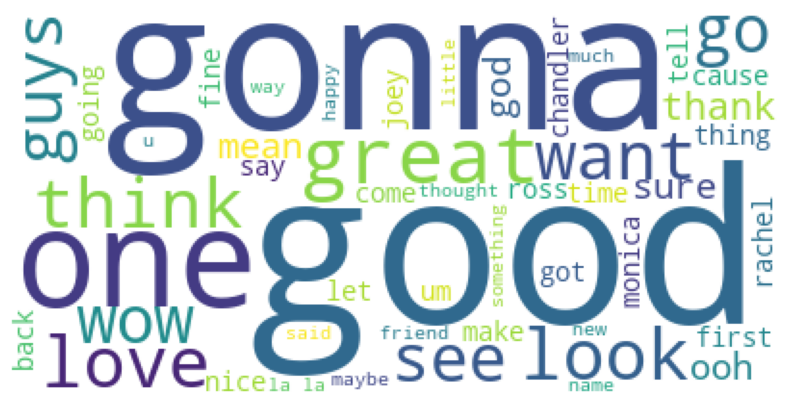

In [48]:
# where Phoebe's sentiments_ are positive
phoebe_pos=script1[(script1["speaker"]=="phoebe buffay") & (script1["sentiments_"]=="positive")]

# removing stopwords
new_stopwords =["well", "okay", "oh", "hey", "know", "yeah", "right", "really","uh", "guy", "im","umm", "ok", "thats"]
stpwrd.extend(new_stopwords)
def clean_(text):
    word1= text.split()
    word= [word for word in word1 if not word in stpwrd]
    word= " ".join(word)
    return word
phoebe_pos["text"]= phoebe_pos["text"].apply(lambda x: clean_(x))

# word cloud
text_combined_= ', '.join(phoebe_pos['text'])
wordcloud = WordCloud(max_words=50, background_color="white").generate(text_combined_)
plt.figure(figsize=(10,5))
plt.axis("off")
plt.imshow(wordcloud)